### Multiple Diffusion through a Single Node

<IPython.core.display.Javascript object>


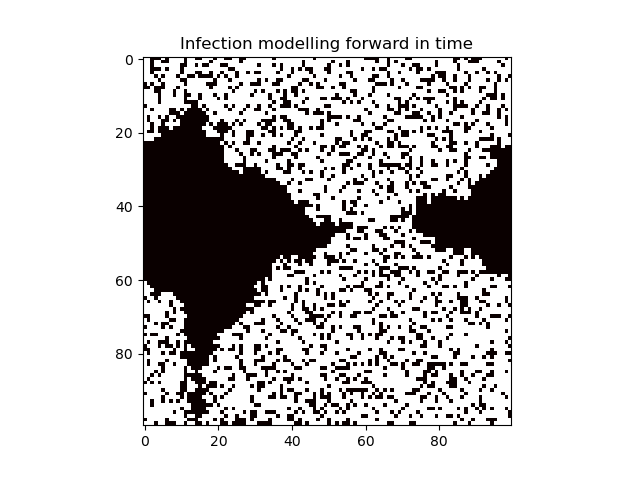

In [3]:
%matplotlib notebook
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
imgs = []
ax = fig.add_subplot(111)

# Simulates the epidemic forward in time
# N is the size of the population, t is how long to simulate, beta gamma eta nu are transition probabilities
def forwardEpidemic(beta,gamma,eta,nu,N,T):
    
    if(checkParams(beta,gamma,eta,nu,N,T)):
        print("change input parameters and try again")
        return
    
    population = initPopulation(N)
    f = np.array(population)
    im = ax.imshow(f, cmap="hot")
    imgs.append([im])



    # iterate through each day, spreading infection/recovering/etc...
    t = 0
    while t <= T:
        population = modelDay(population,beta,gamma,eta,nu)
        t = t+1
        f = np.array(population)
        ax.set_title('Infection modelling forward in time')
        im = ax.imshow(f, cmap="hot")
        imgs.append([im])
    


# initiate population to all susceptible except one infected
def initPopulation(N):
    population= [[0 for i in range(N)] for j in range(N)]
    population[random.randint(0,N-1)][random.randint(0,N-1)] = 1
    return population
    
# check for acceptable user input   

    
# Probibalistically models all transitions a single timestep the day
def modelDay(population,beta,gamma,eta,nu):
    N = len(population)
    for j in range (0,N):
        for i in range (0,N):
            
                # Chance to get infected by neighbour(s) (for all models)
            if getsInfected(population,i,j,beta):
                population[i][j] = 3
                    
                # Chance to recover from infected (for SIR and SIRS model)
            if recovers(population,i,j,gamma):
                population[i][j] = 2
                    
                # Chance to become susceptible again after recovering (for SIRS model)
            if susceptible(population,i,j,eta):
                population[i][j] = 0
                
            # Chance to become resusceptible from infected (for SIS model)
            if resusceptible(population,i,j,nu):
                population[i][j] = 0

        # end of timestep, replace just infected for regular infected
    for j in range(0,N):
        for i in range(0,N):
            if population[i][j] == 3:
                population[i][j] = 1

    return population

def getsInfected(A,i,j,beta):
    N = len(A)
    if A[i][j] == 0:
        infectionChance = random.random()
        return infectionChance < 1 - (1-beta)**infectedNeighbourCount(A,i,j)
        
def recovers(A,i,j,gamma):
    if A[i][j] == 1:
        recoveryChance = random.random()
        return recoveryChance < gamma
    
def susceptible(A,i,j,eta):
    if A[i][j] == 2:
        susceptibleChance = random.random()
        return susceptibleChance < eta
    
def resusceptible(A,i,j,nu):
    if A[i][j] == 1:
        resusceptibleChance = random.random()
        return resusceptibleChance < nu
    
def infectedNeighbourCount(A,i,j):
    N = len(A)
    count = 0
    if A[(i+1) % N][j % N] == 1:
        count = count + 1
    if A[(i-1) % N][j % N] == 1:
        count = count + 1
    if A[i % N][(j+1) % N] == 1:
        count = count + 1
    if A[i % N][(j-1) % N] == 1:
        count = count + 1
    return count
    

forwardEpidemic(0.5,0,0,0.25,100,140)
ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True, repeat_delay=1000)
plt.show()


### Awrae - Spareding Model - SIR 

In [ ]:
#Import libraries
import networkx as nx
import numpy as np
from ndlib.models.ModelConfig import Configuration
from ndlib.models.CompositeModel import CompositeModel
from ndlib.models.compartments.NodeStochastic import NodeStochastic
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

#reading dataset
G1 = nx.read_edgelist('dataset1.txt', nodetype=int)

def takeSecond(elem):
    return elem[1]
Graphtype=nx.Graph()   

#Define graph
G2 = nx.read_edgelist('dataset2.txt', create_using=Graphtype, nodetype=int)
print(nx.info(G2))

#spreading 
FRES_SIR.add_status('Susceptible')
FRES_SIR.add_status('Infected')
FRES_SIR.add_status('Recovered')
FRES_AU.add_status('awared')
FRES_AU.add_status('unaware')

#Define clusture
c1 = NodeStochastic(triggering_status='Infected', rate=0.1, probability=1, name="None")
c2 = NodeStochastic(rate=0.1, probability=1, name="None")

#algoritmo k-clique con k=4
kclique4 = list(community.k_clique_communities(G, 4))
print('Comunity node: ' + str(len(kclique4)))
print(kclique4)

results = pquality.pquality_summary(G, kclique4) 
print(results['Indexes'])
print(results['Modularity'])

for kcom in kclique4:
    for k in kcom:
        if k in conteggio.keys():
            conteggio[k] += 1
        else:
            conteggio[k] = 1

conta=0 #initilize count as zero

for k, v in sorted(conteggio.items(), key=takeSecond, reverse=True):
    print(k,v)
    if (v>1):
        conta+=1
        
print("node is connect "+str(conta))

#Sprading moddel 
FRES = CompositeModel(G)

#Assign role of susceptible infected and recovered
FRES_SIR.add_rule('Susceptible', 'Infected', c1)
FRES_SIR.add_rule('Infected', 'Recovered', c2)
config = Configuration()

#Percentage infected.
config.add_model_parameter('percentage_infected', 0.05)

#Initiliztion
FRES_SIR.set_initial_status(config)

#FRES_diffusion plot generation 
iterations = SIR.iteration_bunch(100, node_status=False)
trends = SIR.build_trends(iterations)
viz = DiffusionTrend(SIR, trends)
viz.plot("diffusion1.pdf")

In [ ]:
#Diffusion analysis - diffusion 2
G = nx.read_edgelist('dataset1.txt', nodetype=int)

FRES = CompositeModel(G)

FRES.add_status('Susceptible')
FRES.add_status('Aware')
FRES.add_status('Infected')
FRES.add_status('Recovered')

#Defininition
c1 = NodeStochastic(triggering_status='Infected', rate=0.1, probability=1, name="None")
c2 = NodeStochastic(rate=0.2, probability=1, name="None")
 

FRES.add_rule('Susceptible', 'Infected', c1)
config = Configuration()


#Statistical value 
config.add_model_parameter('percentage_infected', 0.05)
FRES.set_initial_status(config)

#Setto il primo ciclo di iterazioni
iterations = FRES.iteration_bunch(30, node_status=False)

#Aggiungo la regola che gestisce il tasso di guarigione
FRES.add_rule('Infected', 'Susceptible', c2)


for i in range(1, 11):
    print('node'+str(i)+':', round(len(h.edges())/len(h.nodes()), 3))


#Secondo ciclo di iterazioni 
iterations += FRES.iteration_bunch(70, node_status=False)
trends = FRES.build_trends(iterations)
viz = DiffusionTrend(SIS, trends)
viz.plot("diffusion2.pdf")


In [ ]:


for i in range(1, 11):
    h = nx.read_edgelist('random_graph_' + str(i) + '.txt', nodetype = int)
    print('average degree RG'+str(i)+':', round(len(h.edges())/len(h.nodes()), 3))